In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sns.load_dataset('titanic')
VARS = ['pclass','sex','age','sibsp', 'parch', 'fare']
TARGET = ['survived']

X = data[VARS]
y = data[TARGET]

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=123)
x_train.isna().mean()

pclass    0.000000
sex       0.000000
age       0.210273
fare      0.000000
dtype: float64

In [ ]:
### Imputación por media

media = x_train['age'].mean()
mediana = x_train['age'].median()
x_train['age_media'] = x_train['age'].fillna(media)
x_test['age_media'] = x_test['age'].fillna(media)
x_train['age_mediana'] = x_train['age'].fillna(mediana)
x_test['age_mediana'] = x_test['age'].fillna(mediana)

<Axes: xlabel='age_mediana', ylabel='Count'>

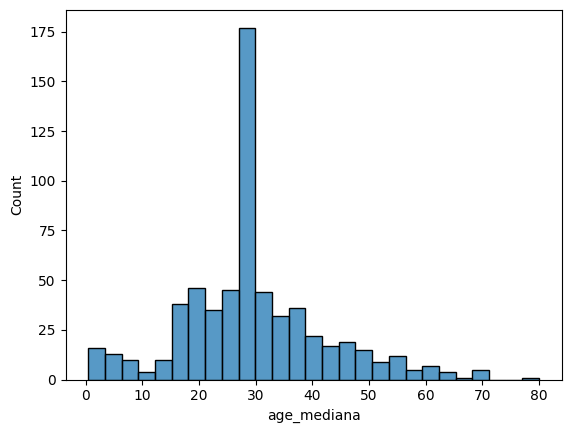

In [ ]:
sns.histplot(x = x_train['age_mediana'])

<Axes: xlabel='age', ylabel='Count'>

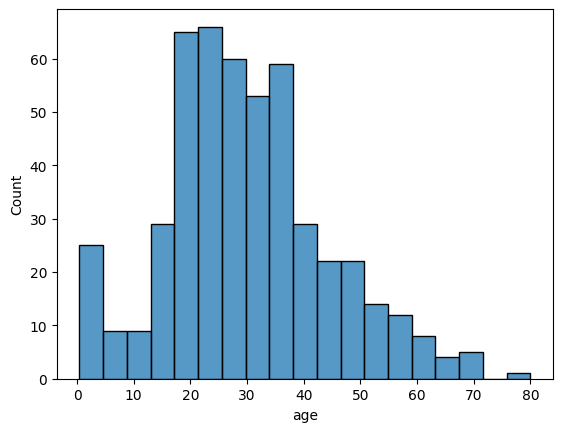

In [ ]:
sns.histplot(x = x_train['age'])

<Axes: xlabel='age_knn', ylabel='Count'>

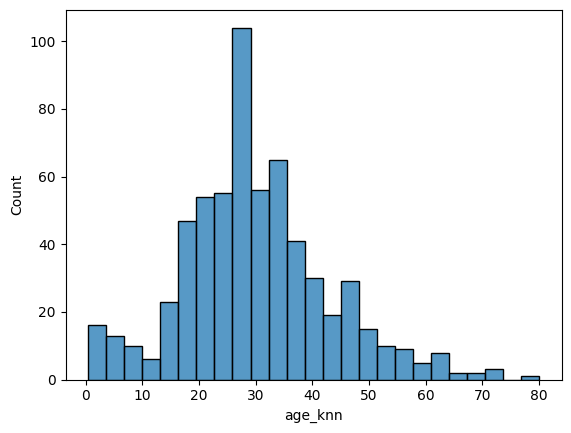

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
x_train['age_knn'] = imputer.fit_transform(x_train[['age','fare','pclass']])[:,0]
x_test['age_knn'] = imputer.transform(x_test[['age','fare','pclass']])[:,0]
sns.histplot(x = x_train['age_knn'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore')
categorical_train = pd.DataFrame(encoder.fit_transform(x_train[['sex']]).toarray(), index = x_train.index, columns = encoder.categories_[0])
categorical_test = pd.DataFrame(encoder.transform(x_test[['sex']]).toarray(), index = x_test.index, columns = encoder.categories_[0])
x_train_final = pd.concat([x_train, categorical_train], axis = 1)
x_test_final = pd.concat([x_test, categorical_test], axis = 1)


In [ ]:
x_train_final

,pclass,sex,age,fare,age_media,age_mediana,age_preprocessed,age_knn,female,male
416,2,female,34.0,32.5000,34.0,34.0,34.0,34.0,1.0,0.0
801,2,female,31.0,26.2500,31.0,31.0,31.0,31.0,1.0,0.0
512,1,male,36.0,26.2875,36.0,36.0,36.0,36.0,0.0,1.0
455,3,male,29.0,7.8958,29.0,29.0,29.0,29.0,0.0,1.0
757,2,male,18.0,11.5000,18.0,18.0,18.0,18.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
98,2,female,34.0,23.0000,34.0,34.0,34.0,34.0,1.0,0.0
322,2,female,30.0,12.3500,30.0,30.0,30.0,30.0,1.0,0.0
382,3,male,32.0,7.9250,32.0,32.0,32.0,32.0,0.0,1.0
365,3,male,30.0,7.2500,30.0,30.0,30.0,30.0,0.0,1.0


In [ ]:
### Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

modelo_nb = GaussianNB()
modelo_rl = LogisticRegression()
modelo_arbol = DecisionTreeClassifier()
def train_predict(modelo, vars):
  modelo.fit(x_train_final[vars], y_train)
  preds = modelo.predict(x_test_final[vars])
  preds_proba = modelo.predict_proba(x_test_final[vars])
  return modelo, preds, preds_proba


modelo_uno, preds_uno, probas_uno = train_predict(modelo_nb, ['pclass','age_media','fare','female','male'])
modelo_dos, preds_dos, probas_dos = train_predict(modelo_nb, ['pclass','age_mediana','fare','female','male'])
modelo_tres, preds_tres, probas_tres = train_predict(modelo_nb, ['pclass','age_knn','fare','female','male'])
modelo_cuatro, preds_cuatro, probas_cuatro = train_predict(modelo_nb, ['pclass','age_knn','fare','female'])
modelo_cinco, preds_cinco, probas_cinco = train_predict(modelo_rl, ['pclass','age_knn','fare','female','male'])
modelo_seis, preds_seis, probas_seis = train_predict(DecisionTreeClassifier(max_depth = 3), ['pclass','age_knn','fare','female','male'])
modelo_siete, preds_siete, probas_siete = train_predict(DecisionTreeClassifier(max_depth = 4), ['pclass','age_knn','fare','female','male'])
modelo_ocho, preds_ocho, probas_ocho = train_predict(DecisionTreeClassifier(max_depth = 5), ['pclass','age_knn','fare','female','male'])
modelo_nueve, preds_nueve, probas_nueve = train_predict(DecisionTreeClassifier(max_depth = 6), ['pclass','age_knn','fare','female','male'])


In [ ]:
### AUC

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,probas_uno[:,1]))
print(roc_auc_score(y_test,probas_dos[:,1]))
print(roc_auc_score(y_test,probas_tres[:,1]))
print(roc_auc_score(y_test,probas_cuatro[:,1]))
print(roc_auc_score(y_test,probas_cinco[:,1]))
print(roc_auc_score(y_test,probas_seis[:,1]))
print(roc_auc_score(y_test,probas_siete[:,1]))
print(roc_auc_score(y_test,probas_ocho[:,1]))
print(roc_auc_score(y_test,probas_nueve[:,1]))



0.8513805522208883
0.8538415366146459
0.8546818727490996
0.8525210084033613
0.8573229291716686
0.8460684273709485
0.8596338535414165
0.8637154861944779
0.851500600240096


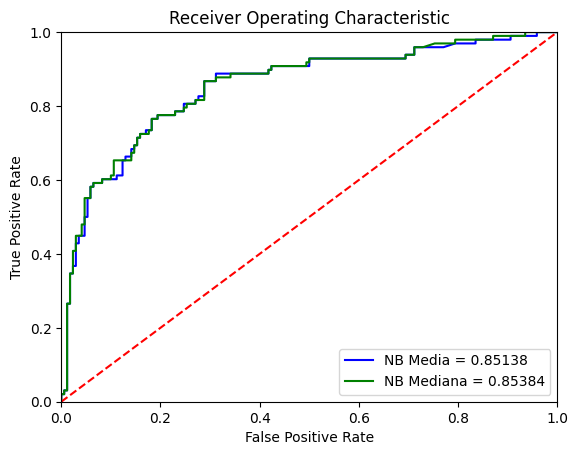

In [ ]:
### Dibujar la curva ROC
from sklearn.metrics import roc_curve, auc


fpr_1, tpr_1, threshold_1 = roc_curve(y_test, probas_uno[:,1])
roc_auc_1 = auc(fpr_1, tpr_1)


fpr_2, tpr_2, threshold_2 = roc_curve(y_test, probas_dos[:,1])
roc_auc_2 = auc(fpr_2, tpr_2)

# method I: plt

plt.title('Receiver Operating Characteristic')
plt.plot(fpr_1, tpr_1, 'b', label = 'NB Media = %0.5f' % roc_auc_1)
plt.plot(fpr_2, tpr_2, 'g', label = 'NB Mediana = %0.5f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [ ]:
from sklearn.metrics import confusion_matrix

costos = np.array([[1000,-1000],[-500,100]])
print(np.sum(confusion_matrix(y_test,preds_uno) *costos))
print(np.sum(confusion_matrix(y_test,preds_ocho) *costos))

109000
117000


In [ ]:
from sklearn import metrics
from sklearn.model_selection import cross_validate

cv_results = cross_validate(modelo_nb, x_train_final[['pclass','age_media','fare','female','male']], y_train, cv=100, scoring = 'roc_auc', return_train_score = True)


<Axes: >

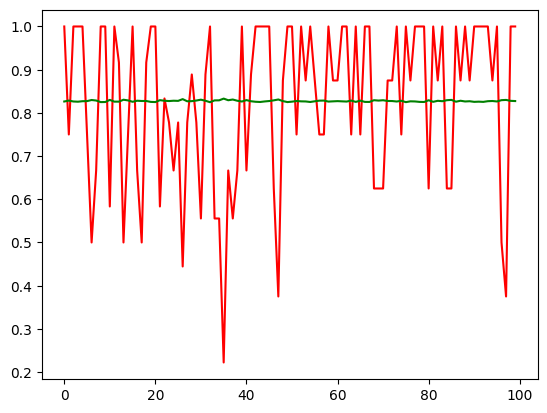

In [ ]:
sns.lineplot(x = np.arange(0,100),y = cv_results['test_score'], color = 'red')
sns.lineplot(x = np.arange(0,100),y = cv_results['train_score'], color = 'green')

In [ ]:
print(np.mean(cv_results['test_score']))
print(np.mean(cv_results['train_score']))
print(np.std(cv_results['test_score']))
print(np.std(cv_results['train_score']))

0.82875
0.8274342972507001
0.18912418963458447
0.0017024254749531881


In [ ]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(modelo_nb, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test_final[['pclass','age_knn','fare','female']], y_test)
result

0.7947761194029851